# Ứng dụng Giải thuật di truyền tìm kiếm Kiến trúc mạng nơ-ron tối ưu

Mạng nơ-ron tích chập (CNN) là giải pháp tiên tiến nhất cho nhận dạng hình ảnh quy mô lớn. Theo một số nguyên tắc cơ bản như tăng độ sâu của mạng và xây dựng các kết nối tắt, các nhà nghiên cứu đã thiết kế thủ công nhiều kiến trúc mạng cố định và xác minh hiệu quả của chúng. Trong bài viết này, chúng ta thảo luận về khả năng tự học kiến trúc mạng sâu. Lưu ý rằng số lượng kiến trúc mạng có thể tăng lên một cách chóng mặt với số lượng các lớp trong mạng, là động lực để áp dụng thuật toán di truyền cho việc khám phá hiệu quả không gian tìm kiếm rộng lớn này.

Ý tưởng chính là đề xuất một phương pháp mã hóa để biểu diễn mỗi kiến trúc mạng theo một chuỗi nhị phân độ dài cố định. Thuật toán di truyền bắt đầu bằng việc khởi tạo một tập hợp các cá thể ngẫu nhiên. Trong mỗi thế hệ, chúng ta định nghĩa các toán tử di truyền tiêu chuẩn, ví dụ, *chọn lọc, đột biến và lai ghép*, để tạo ra các cá thể cạnh tranh và loại bỏ những cá thể yếu. Sự cạnh tranh của mỗi cá thể được định nghĩa là độ chính xác nhận dạng của nó, thu được thông qua quá trình đào tạo độc lập trên một bộ dữ liệu tham chiếu. Chúng tôi thực hiện quá trình di truyền trên CIFAR-10, một bộ dữ liệu quy mô nhỏ, chứng minh khả năng tìm kiếm kiến trúc chất lượng cao mà trước đây ít được nghiên cứu. Các kiến trúc mạnh mẽ đã học cũng có thể chuyển giao cho bộ dữ liệu ILSVRC2012 để nhận dạng hình ảnh quy mô lớn.

# Giới thiệu

Nhận dạng hình ảnh là một nhiệm vụ cơ bản trong thị giác máy tính, ngụ ý một loạt các ứng dụng. Gần đây, các thuật toán tiên tiến nhất về nhận dạng hình ảnh chủ yếu dựa trên Mạng nơ-ron tích chập sâu (CNN). Bắt đầu từ các mô hình mạng dạng chuỗi cơ bản, các nhà nghiên cứu đã tăng độ sâu của mạng, cũng như thiết kế các mô-đun mạng mới để cải thiện độ chính xác nhận dạng. Mặc dù những mạng hiện đại này đã được chứng minh là hiệu quả, chúng tôi lưu ý rằng kiến trúc của chúng được thiết kế thủ công, không được học, điều này giới hạn tính linh hoạt của cách tiếp cận.

Trong bài báo này, các tác giả tiết lộ khả năng tự động học kiến trúc của mạng nơ-ron sâu. Chúng ta xem xét một trường hợp riêng, trong đó mạng chỉ có một số lượng hạn chế các giai đoạn, và mỗi giai đoạn được xác định là một tập hợp các khối xây dựng được định trước như các **lớp tích chập** (convolution) và **lớp gộp** (pooling). Ngay cả trong những giới hạn này, tổng số kiến trúc mạng có thể tăng lên một cách chóng mặt với số lượng các lớp, làm cho việc liệt kê tất cả các ứng viên và tìm ra cái tốt nhất trở nên không thực tế. Thay vào đó, chúng ta định hình vấn đề này như là tối ưu hóa trong một không gian tìm kiếm lớn và áp dụng thuật toán di truyền để khám phá không gian này một cách hiệu quả.

Thuật toán di truyền bao gồm việc xây dựng một quần thể ban đầu của các cá thể và thực hiện các toán tử di truyền để cho phép chúng tiến hóa trong một quá trình lặp lại. Nhóm tác giả đề xuất một lược đồ mã hóa mới để biểu diễn mỗi kiến trúc mạng dưới dạng một chuỗi nhị phân độ dài cố định và xác định một số toán tử di truyền tiêu chuẩn, tức là, chọn lọc, đột biến và lai ghép, để sinh ra các cá thể cạnh tranh mới từ thế hệ trước và loại bỏ những cá thể yếu. Chất lượng (hàm thích nghi, fitness function) của mỗi cá thể được xác định bởi độ chính xác nhận dạng của nó trên một bộ dữ liệu tham chiếu. Đến cuối cùng, chúng ta thực hiện một quá trình đào tạo hoàn chỉnh cho mỗi cá thể (tức là, kiến trúc mạng) độc lập với thuật toán di truyền. Quá trình di truyền kết thúc sau một số thế hệ cố định.

Đáng chú ý là thuật toán di truyền có chi phí tính toán cao, vì chúng ta cần trải qua một quá trình đào tạo mạng hoàn chỉnh cho mỗi cá thể được tạo ra. Nhóm tác giả áp dụng chiến lược để chạy quá trình di truyền trên một bộ dữ liệu nhỏ (CIFAR-10), trong đó họ quan sát khả năng của thuật toán di truyền tìm kiếm kiến trúc mạng hiệu quả, sau đó chuyển giao các kiến trúc hàng đầu đã học để thực hiện nhận dạng hình ảnh quy mô lớn. Các kiến trúc đã học, phần lớn trong số đó trước đây ít được nghiên cứu, thường hoạt động tốt hơn so với những kiên trúc được thiết kế thủ công trong cả thí nghiệm quy mô nhỏ và quy mô lớn.

# Biểu diễn mạng nhị phân

Chúng ta cung cấp một biểu diễn dạng chuỗi nhị phân cho kiến trúc mạng trong một trường hợp bị hạn chế. Chúng tôi xem xét những kiến trúc mạng có thể được tổ chức trong một số giai đoạn. Trong mỗi giai đoạn, kích thước hình học (chiều rộng, chiều cao và chiều sâu) của khối dữ liệu vẫn không đổi. Các giai đoạn kề nhau được kết nối thông qua một thao tác gộp không gian, có thể thay đổi độ phân giải không gian. Tất cả các thao tác tích chập trong một giai đoạn đều có cùng số bộ lọc, còn được gọi là kênh dữ liệu.

Chúng tôi tuân theo ý tưởng này để định nghĩa một nhóm mạng có thể được mã hóa thành chuỗi nhị phân có độ dài cố định. Một mạng được cấu thành từ $S$ giai đoạn, và giai đoạn thứ $s$ $(s=1,2,\ldots,S)$ chứa tất cả $K_s$ nút, được kí hiệu bởi $v_{s,k_s}$ $(k_s=1,2,\ldots,K_s)$. Các nút trong mỗi giai đoạn được sắp xếp theo thứ tự và chúng tôi chỉ cho phép kết nối từ một nút có số thứ tự nhỏ hơn đến nút có số thứ tự lớn hơn. Mỗi nút tương ứng với một thao tác tích chập, diễn ra sau khi tổng hợp từng phần tử của tất cả các nút đầu vào của nó (các nút có số thứ tự nhỏ hơn được kết nối với nó). Sau tích chập, Chuẩn hóa theo lô (Batch Normalization) và ReLU được áp dụng tiếp theo, đã được chứng minh là hiệu quả trong việc đào tạo mạng nơ-ron rất sâu. Chúng ta không mã hóa các lớp được kết nối đầy đủ của mạng.

Trong mỗi giai đoạn, chúng ta sử dụng $\frac{1}{2}K_s(K_s-1)$ bit để mã hóa các kết nối giữa các nút. Bit đầu tiên biểu diễn kết nối giữa $(v_{s,1},v_{s,2})$, sau đó 2 bit tiếp theo biểu diễn kết nối giữa $(v_{s,1},v_{s,3})$ và $(v_{s,2},v_{s,3}),\ldots$ Quá trình này tiếp tục cho đến khi $K_s-1$ bit cuối cùng được sử dụng để biểu diễn kết nối giữa $v_{s,1},v_{s,2},\ldots,v_{s,K_s-1}$ và $v_{s,K_s}$. Đối với mỗi $1 \leq i <j \leq K_s$ nếu bit tương ứng với $(v_{s,i},v_{s,j})$ là $1$ thì nghĩa là có một cạnh kết nối $v_{s,i}$ và $v_{s,j}$ tức là $v_{s,j}$ nhận đầu ra của $v_{s,i}$ như một phần của phép tổng từng phần tử, và ngược lại. Tóm lại, một mạng có $S$ giai đoạn với $K_s$ nút ở giai đoạn thứ $s$ được mã hòa thành chuỗi nhị phân có độ dài $L=\sum_{s=1}^S \frac{1}{2}K_s(K_s-1)$. Số lượng kiến trúc mạng khác nhau có thể có là $2^L$.

# Chi tiết kỹ thuật

Để làm cho mọi chuỗi nhị phân hợp lệ, chúng tôi xác định hai nút mặc định trong từng giai đoạn. Nút đầu vào mặc định, được ký hiệu là $v_{s,0}$, nhận dữ liệu từ giai đoạn trước, thực hiện tích chập và gửi đầu ra của nó tới mọi nút mà không có nút trước đó, ví dụ như $v_{s,1}$. Nút đầu ra mặc định, được ký hiệu là $v_{s, K_s+1}$, nhận dữ liệu từ tất cả các nút mà không có nút kế thừa, ví dụ $v_{s, K_s}$, lấy tổng của chúng, thực hiện tích chập và gửi đầu ra của nó đến lớp gộp (pooling layer). Lưu ý rằng các kết nối giữa các nút thông thường và các nút mặc định không được mã hóa.

Có hai trường hợp đặc biệt. Đầu tiên, nếu một nút thông thường $v_{s, i}$ bị cô lập (nói chính xác là nó không được kết nối với bất kỳ nút thông thường nào khác $v_{s,j},i \neq j$), thì nó sẽ là bị bỏ qua hay nó không được kết nối với nút đầu vào mặc định cũng như nút đầu ra mặc định. Điều này nhằm đảm bảo rằng một giai đoạn có
nhiều nút hơn có thể mô phỏng tất cả các cấu trúc được biểu thị bằng một giai đoạn có ít nút hơn. Thứ hai, nếu không có bất kỳ kết nối nào ở một giai đoạn nghĩa là, tất cả các bit trong chuỗi nhị phân là $0$, khi đó thao tác tích chập chỉ được thực hiện một lần, không phải hai lần (một được thực hiện bởi nút đầu vào mặc định và nút kia được thực hiện bởi nút đầu ra mặc định).

# Hoạt động di truyền

## Khởi tạo

Chúng ta sẽ khởi tạo một tập hợp các mô hình ngẫu nhiên {$M_{0,n}$}$^N_{n=1}$. Mỗi mô hình là một chuỗi nhị phân với $L$ bit, nghĩa là, $M_{0,n}$ : $b_{0,n} \in \left\{0, 1\right\}^L$. Mỗi bit trong mỗi cá nhân là mỗi mẫu độc lập
từ phân phối Bernoulli: $b^l_{0,n}$ ~ $B(0.5)$, $l =
1, 2, . . . ,L$. Sau đó, chúng ta sẽ đánh giá từng cá nhân (xem phần $3.2.4$) để thu được các giá trị hàm thích hợp của chúng. Như chúng ta sẽ thấy trong phần $4.1.2$, các chiến lược khởi tạo khác nhau không ảnh hưởng quá nhiều đến hiệu suất di truyền. Ngay cả khi bắt đầu với một khởi tạo đơn giản (tất cả các cá nhân đều là chỉ chứa bit $0$), quá trình di truyền có thể tìm ra các cấu trúc thông qua lai ghép (crossover) và đột biến (mutation).

## Lựa chọn

Quá trình lựa chọn được thực hiện vào đầu mỗi thế
hệ (generation). Trước thế hệ thứ $t$, cá thể thứ $n$ là $M_{t-1,n}$ được gán bởi một hàm thích nghi, được định nghĩa là tỷ lệ nhận dạng $r_{t-1,n}$ thu được ở thế hệ trước hoặc lần khởi tạo trước. $r_{t-1,n}$ tác động trực tiếp tới xác suất $M_{t-1,n}$ "sống sót" qua quá trình lựa chọn.

Chúng ta thực hiện quy trình roulette kiểu Nga để xác
định cá nhân nào sẽ "sống sót". Mỗi cá thể ở thế hệ tiếp theo $M_{t,n}$ được xác định độc lập bởi một sự không đồng nhất trên tập $\left\{ M_{t-1,n} \right\}^N_{n=1}$. Xác suất của mẫu $M_{t−1,n}$ tỷ lệ với $r_{t−1,n} - r_{t−1,0}$, trong đó $r_{t-1,0} = \min^N_{n=1}\left\{r_{t−1,n}\right\}$ là giá trị hàm thích nghi tối thiểu ở thế hệ trước. Điều này có nghĩa là cá thể giỏi nhất có xác suất được chọn cao nhất và cá thể kém nhất luôn bị loại. Số lượng cá thể $N$ không thay đổi, mỗi cá thể ở thế hệ trước có thể được chọn nhiều lần.

## Đột biến (Mutation) và lai ghép (Crossover)

Quá trình đột biến của một cá thể $M_{t,n}$ liên quan đến việc đảo bit một cách độc lập với xác suất $q_M$. Trong thực tế, $q_M$ thường nhỏ, ví dụ như $0,05$, do đó sự đột biến đó không có khả năng làm thay đổi một cá thể quá nhiều. Điều này nhằm bảo toàn những đặc tính của một cá nhân còn "sống sót" đồng thời tạo cơ hội thử nghiệm những khả năng mới.

Quá trình lai ghép liên quan đến việc thay đổi hai cá nhân cùng một lúc. Thay vì xem xét từng bit riêng lẻ, đơn vị cơ bản trong lai ghép là một giai đoạn, được thúc đẩy bởi nhu cầu giữ lại các cấu trúc cục bộ trong mỗi giai đoạn. Tương tự như đột biến, mỗi cặp giai đoạn tương ứng được hoán đổi với xác suất nhỏ $q_C$.

Cả đột biến và lai ghép đều được thực hiện trong sơ đồ
tổng thể (xem Thuật toán 1). Xác suất đột biến và lai ghép của mỗi cá thể (hoặc cặp) là $p_M$ và $p_C$ tương ứng. Tất nhiên, có nhiều cách khác nhau để thực hiện đột biến và lai ghép. Trong các thử nghiệm, sự lựa chọn đơn giản của chúng ta sẽ tạo ra hiệu quả cạnh tranh.


## Đánh giá

Sau các quá trình trên, mỗi cá nhân $M_{t,n}$ được đánh giá để thu được giá trị hàm thích hợp. Bộ dữ liệu tham khảo $D$ được xác định trước và chúng ta sẽ train riêng từng mô hình $M_{t,n}$ từ đầu. Nếu như $M_{t,n}$ đã được đánh giá trước đó, ta chỉ cần đánh giá lại một lần nữa và tính toán độ chính xác trung bình trên tất cả các lần xuất hiện của nó. Chiến lược này ít nhất ở một mức độ nào đó, làm giảm bớt sự không ổn định do tính ngẫu nhiên trong quá trình training.

### **Thuật toán 1**: Quy trình di truyền cho thiết kế mạng

$1.$ **Input**: Tập dữ liệu tham khảo $D$,số lượng thế hệ $T$, số lượng cá thể ở mỗi thế hệ $N$,các xác suất đột biến và chéo $p_M$ và $p_C$, tham số đột biến $q_M$ và tham số chéo $q_C$.

$2.$ **Khởi tạo**: Tạo ra một tập hợp các cá thể ngẫu nhiên $\left\{ M_{0,n} \right\}^N_{n=1}$ và tính toán độ chính xác nhận dạng của chúng.

$3.$ **for** $t = 1, 2, . . . , T$ **do:** \\
***Lựa chọn***: Tạo ra thế hệ mới $\left\{ M'_{t,n} \right\}^N_{n=1}$ với quy trình roulette kiểu Nga trên $\left\{ M_{t-1,n} \right\}^N_{n=1}$; \\

***Lai ghép***: Với mỗi cặp $\left\{ (M_{t,2n - 1}, M_{t,2n}) \right\}^{\lfloor \frac{N}{2} \rfloor}_{n=1}$, thực hiện lai ghép với xác suất $p_C$ và tham số $q_C$; \\

***Đột biến***: Với mỗi cá thể không lai ghép $\left\{ M_{t,n} \right\}^N_{n=1}$, thực hiện đột biến với xác suất $p_M$ và tham số $q_M$; \\

***Đánh giá***: Tính toán độ chính xác nhận dạng cho từng cá thể mới $\left\{ M_{t,n} \right\}^N_{n=1}$;

**end for**.

$4.$ **Output**: Tập hợp các cá thể ở thế hệ cuối cùng $\left\{ M_{T,n} \right\}^N_{n=1}$ với độ chính xác nhận dạng của chúng.

# Thực nghiệm

## Thực nghiệm trên bộ ***CIFAR10***.

Tập dữ liệu **CIFAR10** có mỗi ảnh sẽ thuộc $1$ trong $10$ classes trong đó mỗi ảnh sẽ có kích thước $32×32×3$ (3 lớp màu R, G, B). Có 50.000 hình ảnh cho tập train và 10.000 hình ảnh để thử nghiệm. Để tránh nhìn thấy dữ liệu test trong quá trình di truyền, chúng ta bỏ qua 10.000 hình
ảnh từ tập huấn luyện để xác nhận.

## Cài đặt và kết quả.

Cấu hình cơ bản tuân theo phiên bản sửa đổi của
**LeNet** và cấu trúc mạng được thể hiện qua: \\

*C3(P1)@8-MP3(S2)-C3(P1)@8-MP3(S2)- C3(P1)@16-MP3(S2)-
FC32-D0.5-FC10*. \\

Trong đó, *C3(P1)@8* là một lớp tích chập với kích
thước kernel là $3×3$, bước nhảy (stride) mặc định là $1$,
chiều rộng của lớp đệm (padding) là $1$ và số kernel là $8$. *MP3(S2)* là lớp max - pooling với kích thước hạt nhân là $3$ và bước nhảy là $2$, *FC32* là một lớp được kết nối đầy đủ với $32$ outputs và *D0.5* là lớp Dropout có tỷ lệ drop là $0.5$. Lưu ý rằng chúng ta sẽ giảm đáng kể số lượng bộ lọc ở
mỗi giai đoạn để đẩy nhanh quá trình training. Ta sẽ áp dụng $120$ training epochs với tốc độ học là $10^{-2}$, theo đó là $60$ epochs với tốc độ học là $10^{−3}$, $40$ epochs với tốc độ học là $10^{−4}$ và $20$ epochs với tốc độ học là $10^{−5}$.






# Nghiên cứu các kiến trúc cho nhận dạng ảnh có thể mở rộng
<h2> Giới thiệu </h2>
<p> Phát triển các mô hình mạng nơ-ron phân loại hình ảnh thường yêu cầu kỹ thuật thiết kế kiến trúc đáng kể. Bắt đầu từ công trình tiên phong về kiến trúc tích chập cho phân loại ImageNet, những cải tiến liên tiếp trong kỹ thuật thiết kế kiến trúc đã đạt được những kết quả ấn tượng. </p>
<p> Trong bài báo này, chúng tôi nghiên cứu một quy trình mới để thiết kế các kiến trúc tích chập và mô tả một phương pháp có thể mở rộng để tối ưu hóa các kiến trúc tích chập trên một tập dữ liệu quan tâm, chẳng hạn tập dữ liệu ImageNet. Phương pháp của chúng tôi đươc lấy cảm ứng từ Neural Architecture Search (NAS) được đề xuất gần đây, sử dụng phương pháp tìm kiếm học tăng cường để tối ưu hóa cấu hình kiến trúc. Tuy nhiên, việc áp dụng NAS hay bất kỳ phương pháp tìm kiếm nào khác trực tiếp cho một tập dữ liệu lớn như ImageNet là rất phức tạp về mặt tính toán. Do đó chúng tôi đề xuất tìm kiếm một kiến trúc tốt trên một tập dữ liệu thay thế, chẳng hạn tập CIFAR-10 nhỏ hơn, sau đó áp dụng kiến trúc học được cho ImageNet. Chúng tôi đã thiết kế một không gian tìm kiếm (mà chúng tôi gọi là "Không gian tìm kiếm NASNet" sao cho độ phức tạp của kiến trúc không phụ thuộc vào chiều sâu của mạng và kích thước của hình ảnh đầu vào. Cụ thể, tất cả các mạng nơ-ron tích chập trong không gina tìm kiếm của chúng tôi đều được cấu tạo từ các lớp tích chập có cấu trúc giống hệt nhau nhưng trọng số khác nhau. Do đó việc tìm kiếm các kiến trúc tích chập tốt nhất quy về việc tìm kiếm cấu trúc lớp tích chập tốt nhất. Việc tìm kiếm cấu trúc lớp tích chập tốt nhất có hai lợi ích chính: một là nó nhanh hơn nhiều so với việc tìm kiếm toàn bộ kiến trúc mạng nơ-ron, hai là bản thân lớp tích chập có nhiều khả năng tổng quát cho các bài toán khác. Trong các thí nghiệm của chúng tôi, phương pháp này đã tăng tốc đáng kể việc tìm kiếm kiến trúc tốt nhất bằng CIFAR-10 lên 7 lần và học được các kiến trúc có thể áp dụng thành công sang ImageNet. </p>
<p> Kết quả chính của chúng tôi là kiến trúc tốt nhất được tìm thấy trên CIFAR-10, được gọi là NASNet, đạt được độ chính xác tiên tiến nhất khi chuyển sang phân loại ImageNet mà không cần sửa đổi nhiều. Trên ImageNet, NASNet đạt được độ chính xác tốt nhất trong các công trình được công bố, với độ chính xác 82,7% top-1 và 96,2% top-5. Độ chính xác top-1 tốt hơn 1,2% so với các kiến trúc tốt nhất trước đó và có ít hơn 9 tỉ phép tính một giây. Trên bộ dữ liệu CIFAR-10, NASNet có tỉ lệ lỗi là 2,4%, đây cũng là mức tốt hiện nay. </p>
<p> Thêm vào đó, chỉ bằng việc thay đổi số lớp tích chập và số bộ lọc trong các lớp tích chập, ta có thể tạo ra những phiên bản khác nhau của NASNets phục vụ các nhu cầu tính toán khác nhau. Nhờ đặc tính này, chúng ta có thể tạo ra một họ các mô hình đạt độ chính xác cao hơn tất cả các mô hình trước đó với mức độ tính toán nhỏ hơn hoặc tương đương. Đáng chú ý, phiên bản nhỏ nhất của NASNet đạt độ chính xác top-1 là 74,0% trên bộ dữ liệu ImageNet, cao hơn 3,1% so với các kiến trúc được thiết kế trước đây dành cho các tác vụ thị giác trên thiết bị di động và nhúng. </p>
<p> Cuối cùng, chúng tôi chỉ ra những đặc tính hình ảnh học được bởi NASNets tương đối hữu dụng và có thể áp dụng sang các vấn đề khác. Trong các thí nghiệm của chúng tôi, các đặc tính học được bởi NASNets từ bài toán phân loại ảnh ImageNet có thể kết hợp với khung Faster-RCNN để đạt kết quả tiên tiến về nhiệm vụ phát hiện đối tượng COCO cho cả hai mô hình lớn nhất cũng như mô hình tối ưu hóa cho thiết bị di động. Mô hình NASNet lớn nhất của chúng tôi đạt được mAP 43,1%, cao hơn 4% so với kết quả trước đó. </p>
<h2> Phương pháp thực hiện </h2>
<p> Công trình của chúng tôi sử dụng các phương pháp tìm kiếm để tìm kiến trúc tích chập tốt trên tập dữ liệu được quan tâm. Phương pháp tìm kiếm chính chúng tôi sử dụng trong công trình này là Neural Architecture Search (NAS). Trong NAS, một mạng lưới nơ-ron hồi quy điều khiển (controller recurrent neural network - RNN) sẽ lấy mẫu các mạng con có kiến trúc khác nhau. Các mạng con được huấn luyện đến khi hội tụ để đạt được một độ chính xác nhất định trên tập dữ liệu xác nhận được giữ lại. Độ chính xác thu được được sử dụng để cập nhật bộ điều khiển để bộ điều khiển sẽ tạo ra các kiến trúc tốt hơn theo thời gian. Trọng số của bộ điều khiển được cập nhật bằng thuật toán policy gradient. </p>
<p> Đóng góp chính của công trình này là thiết kế một không gian tìm kiếm mới, sao cho kiến trúc tốt nhất được tìm thấy trên tập dữ liệu CIFAR-10 có thể được mở rộng sang các tập dữ liệu hình ảnh lớn hơn, có độ phân giải cao hơn. Chúng tôi gọi không gian tìm kiếm này là NASNet search space vì nó tạo ra NASNet, kiến trúc tốt nhất được tìm thấy trong các thí nghiệm. Một ý tưởng cho không gian tìm kiếm NASNet là việc nhận ra rằng kỹ thuật thiết kế kiến trúc với Convolutional neural network (CNN) thường xác định các motif lặp đi lặp lại bao gồm kết hợp các bộ lọc tích chập, hàm phi tuyến và lựa chọn kết nối cẩn thận để đạt được kết quả tiên tiến nhất (chẳng hạn như các mô-đun lặp đi lặp lại có trong các mô hình Inception và ResNet). Những quan sát này cho thấy rằng có thể cho bộ điều khiển RNN dự đoán một lớp tích chập chung được thể hiện theo các mô-típ này. Lớp này sau đó có thể được xếp chồng lên nhau theo chuỗi để xử lý các đầu vào có kích thước không gian và độ sâu bộ lọc tùy ý. </p>
<p> Trong cách tiếp cận của chúng tôi, kiến trúc tổng thể của các mạng nơ-ron tích chập được xác định trước một cách thủ công. Chúng được cấu thành từ các lớp tích chập được lặp đi lặp lại nhiều lần, trong đó mỗi lớp tích chập có cùng kiến trúc nhưng khác nhau về trọng số. Để dễ dàng xây dựng các kiến trúc có thể mở rộng cho hình ảnh kích thước bất kỳ, chúng tôi cần hai loại lớp tích chập để thực hiện hai chức năng chính khi lấy một bản đồ đặc trưng làm đầu vào: (1) các lớp tích chập trả về một bản đồ đặc trưng có cùng kích thước, và (2) các lớp tích chập trả về một bản đồ đặc trưng trong đó chiều cao và chiều rộng của bản đồ đặc trưng được giảm đi một nửa. Ta gọi hai loại lớp tích chập nói trên lần lượt là Normal Cell và Reduction Cell. Với Reduction Cell, chúng tôi thực hiện phép toán ban đầu với stride bằng 2 để giảm chiều cao và chiều rộng. Tất cả các phép toán chúng tôi dùng để xây dựng các lớp tích chập đều có lựa chọn striding. </p>
<p> Với bộ dữ liệu ImageNet chúng tôi có nhiều Reduction Cells hơn, do kích cỡ ảnh là 299x299 lớn hơn ảnh 32x32 của CIFAR. Reduction Cell và Normal Cell có thể có cùng kiến trúc, tuy nhiên chúng tôi thấy hai kiến trúc riêng biệt sẽ có ích hơn. Chúng tối sử dụng một quy tắc kinh nghiệm phổ biến để tăng gấp đôi số bộ lọc bất cứ khi nào kích thước kích hoạt không gian bị giảm để duy trì kích thước trạng thái ẩn gần như không đổi. Quan trọng hơn, giống như các mô hình Inception và ResNet, chúng tôi coi số lần lặp lại mô-típ N và số bộ lọc tích chập ban đầu là các tham số tự do mà chúng tôi điều chỉnh theo quy mô của bài toán phân loại hình ảnh. </p>
<p> Yếu tố thay đổi trong các lưới tích chập là cấu trúc của Normal và Reduction Cells, chúng được tìm kiếm bởi bộ điều khiển RNN. Trong không gian tìm kiếm của chúng tôi, mỗi cell nhận hai trạng thái ẩn $h_i$ và $h_{i-1}$ làm đầu vào, chúng là đầu ra của hai lớp trước. Bộ điều khiển RNN dự đoán một cách đệ quy phần còn lại của cấu trúc lớp tích chập, dựa trên hai trạng thái ẩn ban đầu này. Các dự đoán này được nhóm thành B khối, trong đó mỗi khối có 5 bước dự đoán được thực hiện bởi 5 bộ phân loại softmax riêng biệt tương ứng với các lựa chọn rời rạc của các phần tử của một khối:</p>

Bước 1: Chọn một trạng thái ẩn từ $h_i$, $h_{i-1}$ hoặc từ các trạng thái ẩn ở các bước trước.

Bước 2: Chọn trạng thái ẩn thứ hai giống như cách chọn ở Bước 1.

Bước 3: Chọn một phép toán để áp dụng vào trạng thái ẩn đã chọn ở Bước 1.

Bước 4: Chọn một phép toán để áp dụng vào trạng thái ẩn đã chọn ở Bước 2.

Bước 5: Chọn một phương thức để kết hợp đầu ra ở Bước 3 và 4 để tạo ra một trạng thái ẩn mới. Phương thức kết hợp có thể là phép cộng từng cặp phần tử tương ứng hoặc phép nối (concatenation) hai trạng thái.
<p> Thuật toán thêm trạng thái ẩn mới được tạo vào tập các trạng thái ẩn hiện có làm đầu vào tiềm năng trong các khối tiếp theo. Bộ điều khiển RNN lặp lại 5 bước dự đoán ở trên B lần tương ứng với B khối trong một lớp tích chập. Trong các thí nghiệm của chúng tôi, việc chọn B = 5 mang lại kết quả tốt, mặc dù chúng tôi chưa tìm kiếm cặn kẽ không gian này do hạn chế về tính toán. </p>
<p> Để bộ điều khiển RNN dự đoán cả Normall Cell và Reduction Cell, ta chỉ cần bộ điều khiển thực hiện $2\times5B$ dự đoán tổng cộng, trong đó $5B$ dự đoán đầu tiên là cho Normal Cell và $5B$ dự đoán sau là cho Reduction Cell. </p>
<p> Cuối cùng, chúng tôi sử dụng đề xuất học tăng cường trong NAS; tuy nhiên, ta cũng có thể sử dụng tìm kiếm ngẫu nhiên để tìm kiếm các kiến trúc trong không gian tìm kiếm NASNet. Trong tìm kiếm ngẫu nhiên, thay vì lấy mẫu các quyết định từ các bộ phân loại softmax trong bộ điều khiển RNN, ta có thể lấy mẫu các quyết định từ phân phối đồng đều. Trong các thí nghiệm của chúng tôi, chúng tôi thấy rằng tìm kiếm ngẫu nhiên hơi kém hơn học tăng cường trên tập dữ liệu CIFAR10. Mặc dù việc sử dụng học tăng cường có giá trị, nhưng khoảng cách nhỏ hơn những gì được tìm thấy trong công việc ban đầu. Kết quả này cho thấy rằng 1) không gian tìm kiếm NASNet được xây dựng tốt sao cho tìm kiếm ngẫu nhiên có thể thực hiện khá tốt và 2) tìm kiếm ngẫu nhiên là một đường cơ sở khó đánh bại. Chúng tôi sẽ so sánh học tăng cường so với tìm kiếm ngẫu nhiên trong Phần 4.4. </p>
<h2> Thí nghiệm và Kết quả </h2>

Trong phần này, chúng tôi mô tả thí nghiệm với phương pháp được đề cập ở bên trên để tìm hiểu các cell tích chập. Trong tóm tắt, tất cả các kiến trúc tìm kiếm đều thực hiện bằng cách dùng phân loại Cifar-10. Điều khiển RNN được huấn luyện bởi Proximal Policy Optimization (PPO) bằng việc dùng hệ thống global workqueue tạo ra 1 pool các mạng con được điều khiển bởi RNN. Trong thí nghiệm này, gồm 500 GPU.

Kết quả của quá trình tìm kiếm là hơn 4 ngày. Nhanh hơn 7 lần so với các phương pháp trước là 28 ngày. Thêm vào đó, chúng tôi chứng minh bên dưới là kết quả này có sự vượt trội về độ chính xác.

Ảnh 4 thể hiện 1 biểu đồ về normal cell và reduction cell. Lưu ý về sự phổ biến của tích chập có thể tách rời và số lượng nhánh được gộp với kiến trúc cạnh tranh (competing). Những thí nghiệm tiếp theo tập trung vào kiến trúc ô tích chập. Mặc dù chúng tôi có kiểm tra tính hiệu quả của các phương pháp khác nhưng những ô tích chập (top ranked) trong thí nghiệm ImageNet (mô tả trong Phụ lục B) và báo cáo kết quả của họ vẫn rất tốt. Chúng tôi gọi 3 mạng được xây dựng từ 3 tìm kiếm xuất sắc là NASNet-A, NASNet-B, NASNet-C.

Chúng tôi chứng minh tính thiết thực của ô tích chập sử dụng kiến trúc đã học từ Cifar10 và nhóm nhiệm vụ phân loại ImageNet. Sau khi tìm hiểu về ô tích chập, có một vài siêu tham số: số lượng ô bị lặp lại và số bộ lọc trong ô tích chập ban đầu. Sau khi chọn số lượng bộ lọc ban đầu, chúng tôi dùng heuristic thông thường để nhân đôi số lượng bộ lọc bất cứ khi nào stride=2. Cuối cùng, chúng tôi định nghĩa 1 ký hiệu đơn giản, 4 @ 64, để biểu thị 2 tham số trong tất cả các mạng. 4 là số ô lặp lại, 64 là số bộ lọc ở lớp cuối của mạng.

Khi huấn luyện NASNets, chúng tôi khám phá được ScheduledDropPath, bản chỉnh sửa của DropPath. Trong DropPath, mỗi path trong cell là ngẫu nhiên làm giảm xác suất trong quá trình huấn luyện. Trong ScheduledDropPath, mỗi path trong cell tách rời (dropped out) với xác suất, tức là tăng tuyến tính trong suốt quá trình huấn luyện. Chúng tôi thấy rằng DropPath không hoạt động tốt với NASNets, trong khi ScheduledDropPath làm tăng ấn tượng hiệu suất của NASNets trong cả hai thí nghiệm Cifar và ImageNet.

4.1 Kết quả phân loại ảnh Cifar-10

Trong task phân loại ảnh với Cifar10, chúng tôi đặt N=4 hoặc 6. Độ chính xác trên tập test như bảng 1.

Trong bảng, NASNet-A với loại bỏ dữ liệu tăng cường đạt tỷ lệ lỗi là 2,40% (trung bình sau 5 lần chạy), tốt hơn lần trước là 2,56%. Nếu chạy 1 mình thì đạt tỷ lệ lỗi là 2,19%.

4.2 Kết quả phân loại ảnh ImageNet

Chúng tôi thực hiện 1 vài bộ thí nghiệm về ImageNet với ô tích chập tốt nhất được học từ Cifar10.

Kết quả được tóm tắt ở bảng 2, 3 và ảnh 5. Trong bộ thí nghiệm đầu tiên, chúng tôi huấn luyện 1 số hệ thống phân loại ảnh hoạt động trên 299x299 hoặc 331x331 với nhiều thí nghiệm tối ưu tính toán để tạo ra mô hình với chi phí tính toán gần bằng Inception v2, v3 và PolyNet. Chúng tôi thấy rằng nhóm những mô hình này có hiệu suất ấn tượng với ít phép toán dấu phẩy động và tham số hơn kiến trúc được so sánh. Thứ 2, chúng tôi chứng minh được, khi điều chỉnh tỷ lệ của mô hình, chúng tôi thu được hiệu suất ấn tượng với ngân sách tính toán nhỏ hơn, vượt xa so với các mô hình CNN được làm thủ công cho việc này.

Lưu ý, chúng tôi không có kết nối dư giữa những ô tích chập như những mô hình học bước nhảy của chúng tôi. Chúng tôi nhận thấy thêm chúng một cách thủ công không giúp gì cho hiệu suất. Xem phụ lục A để biết chi tiết.

Bảng 2 đưa ra ô tích chập được tìm ra với Cifar10 khái quát rất tốt bài toán ImageNet. Cụ thể, mỗi mô hình dựa trên ô tích chập vượt trội hiệu suất dự đoán của mô hình thủ công tương ứng. Quan trọng, mô hình lớn nhất thu được hiệu suất mới nhất là 82,7% hơn cái tốt nhất trước đây khoảng 1,2%. Trong khi chưa xuất bản, mô hình chúng tôi cũng đạt được 82,7% với ít phép toán dấu phẩy động hơn.

Cuối cùng, chúng tôi kiểm tra làm thế nào ô tích chập tốt nhất có thể thực hiện khi hạn chế tài nguyên. Trong những thiết lập đó, số lượng phép toán dấu phẩy động bị hạn chế nghiêm trọng và hiệu suất dự đoán sẽ phải giảm trở lại (weighed against) với yêu cầu độ trễ trên thiết bị bị giới hạn về tài nguyên tính toán. MobileNet và ShuffleNet có kết quả chính xác gần đây nhất là 70,6% và 70,9%, trên ảnh 224x224 với khoảng 550M phép toán cộng-nhân. Kiến trúc được xây dựng từ những ô tích chập tốt nhất thu được hiệu suất dự đoán vượt trội (74,0%) vượt qua mô hình trước đó với nhu cầu tính toán tương đương. Tóm lại, chúng tôi thấy rằng ô tích chập đã học rất linh hoạt trên các mô hình scales thu được hiệu suất mới nhất trên gần như 2 bậc độ lớn trong ngân sách tính toán.

4.3 Cải thiện tính năng phát hiện vật thể

Mạng phân loại ảnh cung cấp tính năng ảnh chung và có thể chuyển sang vấn đề về thị giác máy tính. Một trong những vấn đề quan trọng nhất là định vị vật thể trong không gian ảnh. Để xác nhận thêm về hiệu suất của nhóm mạng NASNet-A, chúng tôi kiểm tra hệ thống nhận diện vật thể xuất phát từ NASNet-A có cải tiến nhận diện vật thể.

Để giải quyết câu hỏi này, chúng tôi kết nối nhóm mạng NASNet-A đã được huấn luyện với ImageNet với quy trình nhận diện vật thể Faster-RCNN bằng nền tảng phần mềm mã nguồn mở. Chúng tôi huấn luyện lại quy trình nhận diện vật thể trên COCO + tập dữ liệu đã xác minh chưa bao gồm 8000 ảnh nhỏ đã xác minh.

Chúng tôi thực hiện đánh giá mô hình đơn sử dụng 300-500RPN đề xuất mỗi ảnh. Nói cách khác, chúng tôi chỉ truyền 1 ảnh qua 1 mạng. Chúng tôi đánh giá mô hình trên COCO mini-val và tập test-dev và báo cáo độ chính xác trung bình được tính

toán bằng thư viện số COCO chuẩn. Chúng tôi thực hiện 1 tìm kiếm đơn giản ngoài bảng learning rate để xác định mô hình đáp ứng tốt nhất. Cuối cùng, chúng tôi kiểm tra hành vi của 2 hệ thống nhận diện vật thể sử dụng tính năng ảnh tốt nhất (NASNet-A,6@4032) cũng như tính năng ảnh hướng tơi nền tảng di động (NASNet-A,4@1056).

Với mạng di động tối ưu, kết quả trung bình là 29,6% vượt trội hơn mạng di động tối ưu sử dụng Faster-RCNN hơn 5,0%. Với mạng NASNet tốt nhất, hoạt động trên ảnh (800x800) có mAP=40,7%.

Cuối cùng, kết quả khi tăng độ phân giải không gian của ảnh đầu vào thu được kết quả rất tốt, kết quả của một mô hình nhận diện vật thể là 43,1%, vượt qua trước đó hơn 4,0%. Kết quả cho thấy NASNet cung cấp vượt trội, tính năng ảnh chung có thể chuyển sang tác vụ thị giác máy tính khác.

4.4 Hiệu quả của phương pháp kiến trúc tìm kiếm

Mặc dù phương pháp tìm kiếm nào được sử dụng không phải là trọng tâm của bài báo, một câu hỏi mở là tính hiệu quả của phương pháp tìm kiếm học tăng cường. Trong phần này, chúng ta học về mức độ hiệu quả của học tăng cường trong kiến trúc tìm kiếm trên vấn đề phân loại ảnh Cifar10 và so sánh chúng với tìm kiếm ngẫu nhiên bruteforce với lượng tài nguyên tính toán tương đương.

Mô hình tốt nhất được xác minh với RL hơn đáng kể với mô hình tốt nhất tìm bởi RS là hơn 1% trên Cifar10. Thêm vào đó, RL tìm trên toàn bộ pham vi của mô hình, có chất lượng vượt trội hơn tìm kiếm ngẫu nhiên.

Chúng tôi lấy những kết quả này để chỉ ra rằng mặc dù RS có thể cung cấp chiến lược tìm kiếm khả thi nhưng RL tìm thấy các kiến trúc tốt hơn trong không gian tìm kiến NASNet.

In [1]:
import torch.nn as nn

class CustomNode(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CustomNode, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        return self.relu(self.bn(self.conv(x)))

class CustomBlock(nn.Module):
    def __init__(self, encoding, num_channels=64):
        super(CustomBlock, self).__init__()

        # Node 0: default initial node
        self.default_initial_node = CustomNode(num_channels, num_channels)

        # Decode the encoding into individual node connections
        self.node_encodings = []
        idx = 0
        k = 1  # Start with the 1st bit for node 2
        while idx < len(encoding):
            self.node_encodings.append(encoding[idx:idx+k])
            idx += k
            k += 1

        # Adding an extra node for node 1 (that is not encoded)
        self.layers = nn.ModuleList([CustomNode(num_channels, num_channels) for _ in range(len(self.node_encodings) + 1)])

    def forward(self, x):
        outputs = [self.default_initial_node(x)]

        # Processing for node 1
        outputs.append(self.layers[0](outputs[0]))

        for idx, layer in enumerate(self.layers[1:], start=1):
            # Get inputs for this node based on encoding
            node_inputs = [outputs[j] for j, val in enumerate(self.node_encodings[idx-1]) if val == '1']

            # If no inputs from previous nodes, take from default initial node
            if len(node_inputs) == 0:
                node_inputs.append(outputs[0])

            node_input = sum(node_inputs)
            node_output = layer(node_input)
            outputs.append(node_output)

        return outputs[-1]  # Return the output of the last node

# Example usage:
block = CustomBlock("0110010011")
print(block)

CustomBlock(
  (default_initial_node): CustomNode(
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (layers): ModuleList(
    (0-4): 5 x CustomNode(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
  )
)


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Custom CNN with an initial convolution
class CustomCNN(nn.Module):
    def __init__(self, encoding):
        super(CustomCNN, self).__init__()
        self.initial_conv = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.block = CustomBlock(encoding)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(64 * 14 * 14, 10)  # 14x14 is after pooling the 28x28
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.initial_conv(x)
        x = self.block(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 14 * 14)
        x = self.fc(x)
        return self.log_softmax(x)

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Create model, loss function and optimizer
model = CustomCNN("011001").to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print("Finished Training")

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total}%")

100%|██████████| 9912422/9912422 [00:00<00:00, 156571606.49it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 128185919.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38122358.36it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7079349.23it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 0.1628551860528587
Epoch 2, Loss: 0.058214014599177695
Epoch 3, Loss: 0.038247998628610454
Epoch 4, Loss: 0.03239152316162092
Epoch 5, Loss: 0.02735159227376998
Finished Training
Accuracy on test set: 99.06%


In [6]:
import torch
import numpy as np

# 1. Khởi tạo tham số
num_individuals = 5
num_generations = 5
chromosome_length = 10
p_C = 0.8
p_M = 0.5
r_C = 2
r_M = 2

# Hàm khởi tạo quần thể
def initialize_population(num_individuals, chromosome_length):
    return np.random.choice([0, 1], size=(num_individuals, chromosome_length))

# Hàm đánh giá (hàm thích nghi)
def fitness(individual):
    encoding = ''.join(map(str, individual))
    model = CustomCNN(encoding).to(device)
    criterion = nn.NLLLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(5):
        for data in trainloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

# Hàm chọn lọc
def select(population, fitnesses, min_fitness):
    adjusted_fitnesses = fitnesses - min_fitness
    if adjusted_fitnesses.sum() == 0:
        return population[np.random.choice(num_individuals)]
    selection_probs = adjusted_fitnesses / adjusted_fitnesses.sum()
    return population[np.random.choice(range(num_individuals), p=selection_probs)]

# Hàm lai ghép
def crossover(parent1, parent2, p_C, r_C):
    if np.random.rand() < p_C:
        point = np.random.randint(1, len(parent1) - r_C + 1)
        offspring1 = np.concatenate((parent1[:point], parent2[point:point+r_C], parent1[point+r_C:]))
        offspring2 = np.concatenate((parent2[:point], parent1[point:point+r_C], parent2[point+r_C:]))
        return offspring1, offspring2
    return parent1.copy(), parent2.copy()

# Hàm đột biến
def mutate(individual, p_M, r_M):
    for _ in range(r_M):
        if np.random.rand() < p_M:
            point = np.random.randint(len(individual))
            individual[point] = 1 - individual[point]  # Flip the bit
    return individual

# Lưu độ thích nghi của mỗi cá thể qua mỗi thế hệ
all_generations_fitness = []

# Thuật toán di truyền
def genetic_algorithm():
    all_time_min_fitness = float('inf')
    population = initialize_population(num_individuals, chromosome_length)

    for generation in range(num_generations):
        fitnesses = np.array([fitness(ind) for ind in population])
        all_generations_fitness.append(fitnesses)
        all_time_min_fitness = min(all_time_min_fitness, fitnesses.min())

        print(f"Generation {generation + 1}")
        for ind, fit in zip(population, fitnesses):
            print(f"{ind} - Accuracy: {fit:.2f}%")

        new_population = []

        # 2.1 Chọn lọc 4 cá thể đầu tiên
        selected_parents = [select(population, fitnesses, all_time_min_fitness) for _ in range(4)]

        # 2.2 Lai ghép
        offspring1, offspring2 = crossover(selected_parents[0], selected_parents[1], p_C, r_C)
        offspring3, offspring4 = crossover(selected_parents[2], selected_parents[3], p_C, r_C)
        new_population.extend([offspring1, offspring2, offspring3, offspring4])

        # Chọn cá thể thứ 5 và đột biến
        individual = select(population, fitnesses, all_time_min_fitness)
        mutated_individual = mutate(individual, p_M, r_M)
        new_population.append(mutated_individual)

        population = np.array(new_population)

genetic_algorithm()

Generation 1
[0 1 0 1 1 1 1 1 1 1] - Accuracy: 98.63%
[1 1 0 0 0 1 1 1 1 0] - Accuracy: 98.76%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 98.88%
[1 1 0 0 1 1 0 1 0 0] - Accuracy: 98.84%
[0 1 0 0 1 1 0 1 0 0] - Accuracy: 98.73%
Generation 2
[0 1 0 0 1 1 0 1 0 0] - Accuracy: 99.06%
[1 1 0 0 1 1 0 1 0 0] - Accuracy: 98.90%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 98.97%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 99.07%
[0 1 1 0 0 1 1 1 0 1] - Accuracy: 98.83%
Generation 3
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 99.02%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 98.96%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 98.87%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 98.81%
[1 1 1 0 1 1 0 1 0 0] - Accuracy: 98.89%
Generation 4
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 98.84%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 99.07%
[1 1 1 0 1 1 0 1 0 0] - Accuracy: 98.90%
[0 0 1 0 0 1 1 1 0 1] - Accuracy: 98.88%
[0 0 1 0 0 1 1 1 1 1] - Accuracy: 99.05%
Generation 5
[0 0 1 0 0 1 1 1 1 1] - Accuracy: 98.63%
[0 0 1 0 0 1 1 1 1 1] - Accuracy: 98.85%
[0 0 1 0 0 1 1 1 1 1] - Accuracy:

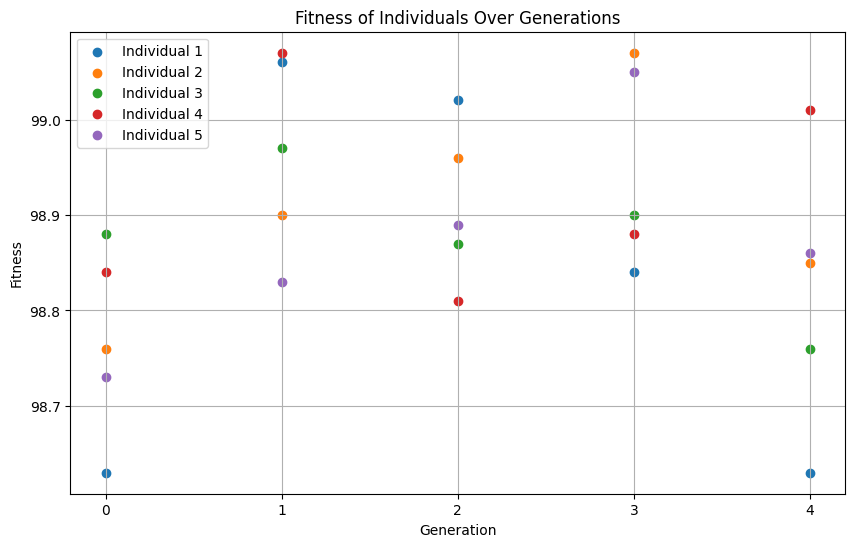

In [10]:
import matplotlib.pyplot as plt

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
for i in range(num_individuals):
    plt.scatter(range(num_generations), [gen[i] for gen in all_generations_fitness], label=f'Individual {i+1}')

plt.title('Fitness of Individuals Over Generations')
plt.xlabel('Generation')
plt.xticks(np.arange(0, num_generations))
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# Chuẩn bị dữ liệu
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Khởi tạo mô hình, hàm mất mát, và trình tối ưu hoá
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CustomCNN("0010011101").to(device) # Chuyển mô hình đến GPU nếu có
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hàm tính độ chính xác
def get_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Huấn luyện mô hình và lưu lại độ chính xác tốt nhất
num_epochs = 100
best_accuracy = 0.0
train_accuracies = []  # Lưu lại độ chính xác trên tập huấn luyện
test_accuracies = []  # Lưu lại độ chính xác trên tập kiểm thử

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_accuracy = get_accuracy(train_loader, model)
    test_accuracy = get_accuracy(test_loader, model)

    # Lưu lại độ chính xác để vẽ đồ thị
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Lưu lại mô hình với độ chính xác tốt nhất
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy

    if (epoch % 10 == 9):
        print(f'Epoch {epoch+1}, Loss: {loss.item():.6f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

print('Finished Training')
print(f'Best accuracy on test set: {best_accuracy}%')

Epoch 10, Loss: 0.000107, Train Accuracy: 99.69%, Test Accuracy: 99.00%
Epoch 20, Loss: 0.000036, Train Accuracy: 99.89%, Test Accuracy: 99.04%
Epoch 30, Loss: 0.000001, Train Accuracy: 99.95%, Test Accuracy: 99.20%
Epoch 40, Loss: 0.000006, Train Accuracy: 99.82%, Test Accuracy: 98.96%
Epoch 50, Loss: 0.000002, Train Accuracy: 100.00%, Test Accuracy: 99.14%
Epoch 60, Loss: 0.000008, Train Accuracy: 100.00%, Test Accuracy: 99.18%
Epoch 70, Loss: 0.000000, Train Accuracy: 100.00%, Test Accuracy: 99.23%
Epoch 80, Loss: 0.000000, Train Accuracy: 99.98%, Test Accuracy: 99.12%
Epoch 90, Loss: 0.000001, Train Accuracy: 100.00%, Test Accuracy: 99.22%
Epoch 100, Loss: 0.000000, Train Accuracy: 100.00%, Test Accuracy: 99.29%
Finished Training
Best accuracy on test set: 99.3%
